In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# use Seaborn theme
sns.set_theme()

EXP_PATH = '../log/runs/'
PLOT_FOLDER = '.'

MAX_EPOCH = 500

In [3]:
# smoothing values
def smooth(values, weight):
    smoothed = np.array(values)
    for i in range(1, smoothed.shape[0]):
        smoothed[i] = smoothed[i-1] * weight + (1 - weight) * smoothed[i]
    return smoothed

In [4]:
def plot_experiment(configs):

    plt.figure(figsize=(4, 3))

    handles = []
    for exp_config in configs["prefixes"]:

        all_runs = os.listdir(EXP_PATH)
        runs = [x for x in all_runs if x.startswith(exp_config)]
        if len(runs) == 0:
            # print("No runs found for %s" % exp_config)
            continue
        x = np.array(range(MAX_EPOCH))
        returns_avg = []
        returns_std = []

        for r in runs:

            folder = os.listdir(os.path.join(EXP_PATH, r))
            assert len(folder) > 0, "No folders found in %s" % os.path.join(EXP_PATH, r)
            if len(folder) > 1:
                # get last folder
                folder = folder[:1]
            progress_file = os.path.join(EXP_PATH, r, folder[0], 'progress.csv')
            df = pd.read_csv(progress_file)
            r_mean = df['evaluation/Returns Mean'].to_numpy()
            r_std = df['evaluation/Returns Std'].to_numpy()

            # assert r_mean.shape[0] >= MAX_EPOCH, r_mean.shape[0]
            # assert r_std.shape[0] >= MAX_EPOCH

            r_mean = r_mean[:MAX_EPOCH]
            r_std = r_std[:MAX_EPOCH]

            returns_avg.append(r_mean)
            returns_std.append(r_std)

        weight = 0.99 # smoothing coefficient
        for idx, (means, stds) in enumerate(zip(returns_avg, returns_std)):
            returns_avg[idx] = smooth(means, weight)
            returns_std[idx] = smooth(stds, weight)

        y_range = (0, 500) # reward scale

        returns_avg = np.array(returns_avg)
        returns_std = np.array(returns_std)

        y_mean = returns_avg.mean(0)
        y_std  = returns_std.mean(0)

        n_points = min(MAX_EPOCH, y_mean.shape[0])
        h, = plt.plot(x[:n_points], y_mean)
        handles.append(h)

        confidence_min = y_mean - y_std
        confidence_max = y_mean + y_std

        plt.fill_between(x[:n_points], confidence_min, confidence_max, alpha=0.15)


    plt.xlabel('training epochs')
    plt.ylabel('episode return')

    plt.xlim(0, MAX_EPOCH)
    plt.ylim(0, 500)

    plt.title(configs["task_name"])

    # plt.legend(
    #     handles, 
    #     ["Panda (OSC)", "Sawyer (OSC)", "Panda (Joint Velocity)", "Sawyer (Joint Velocity)"],
    #     loc=(1.05, 0.56)
    # )

    plt.tight_layout()
    file_name = os.path.join(PLOT_FOLDER, '%s.pdf' % configs["file_name"])
    plt.savefig(file_name, bbox_inches = 'tight', pad_inches = 0)

    print('Saving to %s' % file_name)

In [5]:
all_configs = [
    {
        "task_name": "Door Opening",
        "file_name": "door_opening",
        "prefixes": ["Door-Panda-OSC", "Door-Sawyer-OSC", "Door-Panda-JOINT-VELOCITY", "Door-Sawyer-JOINT-VELOCITY"],
    },
    {
        "task_name": "Block Lifting",
        "file_name": "block_lifting",
        "prefixes": ["Lift-Panda-OSC", "Lift-Sawyer-OSC", "Lift-Panda-JOINT-VELOCITY", "Lift-Sawyer-JOINT-VELOCITY"],
    },
    {
        "task_name": "Block Stacking",
        "file_name": "block_stacking",
        "prefixes": ["Stack-Panda-OSC", "Stack-Sawyer-OSC"],
    },
    {
        "task_name": "Table Wiping",
        "file_name": "table_wiping",
        "prefixes": ["Wipe-Panda-OSC", "Wipe-Sawyer-OSC"],
    },
    {
        "task_name": "Nut Assembly Round",
        "file_name": "nut_assembly_round",
        "prefixes": ["NutAssemblyRound-Panda-OSC", "NutAssemblyRound-Sawyer-OSC"],
    },
    {
        "task_name": "Pick-and-Place Can",
        "file_name": "pick_and_place_can",
        "prefixes": ["PickPlaceCan-Panda-OSC", "PickPlaceCan-Sawyer-OSC"],
    },
    {
        "task_name": "Two Arm Handover",
        "file_name": "two_arm_handover",
        "prefixes": ["TwoArmHandoff-PandaPanda-OSC", "TwoArmHandoff-SawyerSawyer-OSC"],
    },
    {
        "task_name": "Two Arm Peg-in-Hole",
        "file_name": "two_arm_peg_in_hole",
        "prefixes": ["TwoArmPegInHole-PandaPanda-OSC", "TwoArmPegInHole-SawyerSawyer-OSC"],
    },
    {
        "task_name": "Two Arm Lifting",
        "file_name": "two_arm_lifting",
        "prefixes": ["TwoArmLift-PandaPanda-OSC", "TwoArmLift-SawyerSawyer-OSC"],
    }
]

Saving to ./door_opening.pdf
Saving to ./block_lifting.pdf
Saving to ./block_stacking.pdf
Saving to ./table_wiping.pdf
Saving to ./nut_assembly_round.pdf
Saving to ./pick_and_place_can.pdf
Saving to ./two_arm_handover.pdf
Saving to ./two_arm_peg_in_hole.pdf
Saving to ./two_arm_lifting.pdf


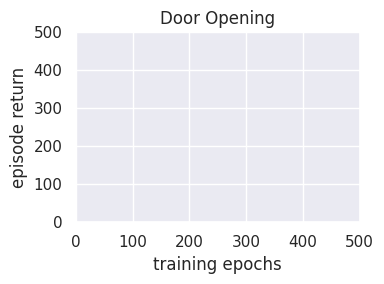

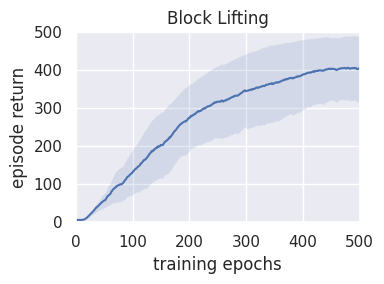

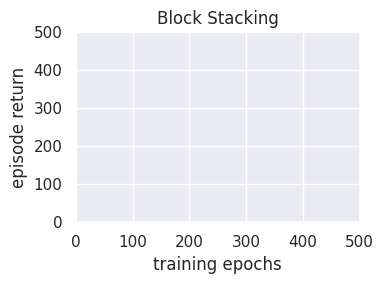

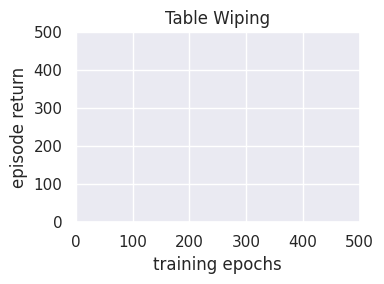

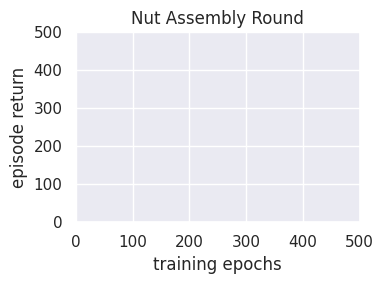

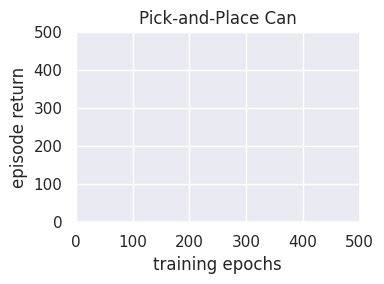

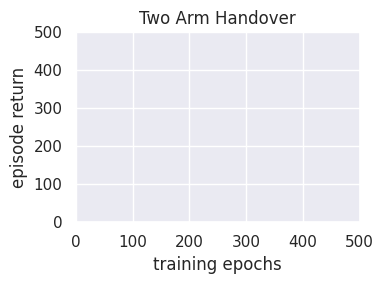

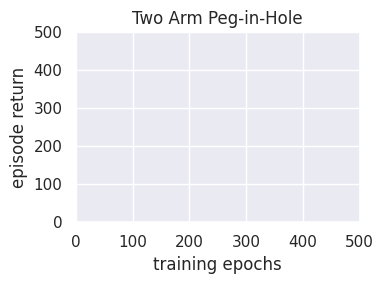

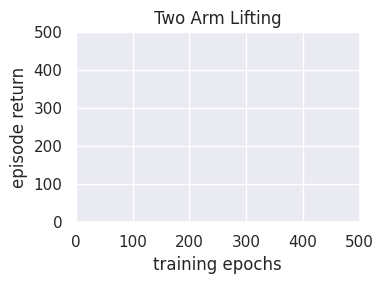

In [6]:
for configs in all_configs:
    plot_experiment(configs)